## Análisis Estadísitco 
### Análisis espacio-temporal de la distribución de la cobertura de suelo y dinámicas de vegetación 

Equipo:
* Martha Juarez
* Adilene
* Paola 
* Benjamin 
* Carlos Velazquez
* Ibsan Morales
* Manuel
* Samuel Cortez

In [2]:
# Librerías para el tratamiento y operación de los datos
import numpy as np
import pandas as pd
import math
# Librerías de visualización de datos
import matplotlib.pyplot as plt
import seaborn as sns
# Librería para el análisis de los datos nulos
import missingno as msno
# Librería con funciones del sistema operativo
import os

# librería para el procesamiento de series de tiempo
from statsmodels.tsa.seasonal import seasonal_decompose

# Librería scipy
from scipy.fft import fft, fftfreq

import statsmodels.formula.api as smf

In [730]:
plt.style.use('ggplot')

In [5]:
# Se obtienen todos los csvs
main_path = 'NDVI/NDVI-DENTRO'
files = os.listdir(main_path)

In [10]:
files

['ENCINAR.csv',
 'MATSUB.csv',
 'MATXERO.csv',
 'MEZQUITAL.csv',
 'PASTINDU.csv',
 'PASTIZAL.csv',
 'SIN ATÍPICOS',
 'VEGARRO.csv']

In [8]:
file_path = os.path.join(main_path, files[0])
data_0 = pd.read_csv(file_path, encoding= 'utf-8')
data_0.head()

X            Y  18-feb.  5-mar.  21-mar.  6-abr.  22-abr.  8-may.  \
0  675860.252  3265951.876     3305    3158     3038    2545     2492    2307   
1  676300.819  3265951.876     3186    3275     2986    2616     2520    2405   
2  676521.102  3262427.342     2942    2798     2856    2580     2327    2174   
3  675419.685  3260444.792     2703    2627     2617    2412     2242    2198   
4  675639.968  3260444.792     2798    2733     2642    2461     2281    2251   

   24-may.  9-jun.  ...  12-ago..5  28-ago..5  13-sep..5  29-sep..5  \
0     2510    2482  ...       5976       6598       6421       5292   
1     2613    2742  ...       6190       6851       6477       5054   
2     2071    2245  ...       5886       6262       5745       4854   
3     2095    2708  ...       5358       6010       5393       4744   
4     2125    2402  ...       5358       6010       5393       4744   

   15-oct..5  31-oct..5  16-nov..5  2-dic..5  18-dic..5  01-ene.  
0       4796       4842       4286      4662       4693     4746  
1       4569       4399       4085      4353       4144     4254  
2       4512       4432       4154      4337       4285     4329  
3       4504       4384       4155      4377       4245     4273  
4       4504       4384       4155      4377       4245     4273  

[5 rows x 483 columns]

In [68]:
# Se ejecutan en un ciclo for la importación de los datos
data_df = pd.DataFrame()
file_list = []
shape_list = []

for file in files:
    if file.find('csv') != -1:
        file_list.append(file)
        file_data = os.path.join(main_path, file)
        df_new = pd.read_csv(file_data,
                            sep = ',',
                            index_col= None,
                            encoding= 'utf-8')
        
        df_new['CAT'] = len(df_new)*[file.strip('.csv')]
    
        data_df = pd.concat([data_df, df_new], axis = 0)

In [69]:
data_df.head()

X            Y  18-feb.  5-mar.  21-mar.  6-abr.  22-abr.  8-may.  \
0  675860.252  3265951.876   3305.0  3158.0   3038.0  2545.0   2492.0  2307.0   
1  676300.819  3265951.876   3186.0  3275.0   2986.0  2616.0   2520.0  2405.0   
2  676521.102  3262427.342   2942.0  2798.0   2856.0  2580.0   2327.0  2174.0   
3  675419.685  3260444.792   2703.0  2627.0   2617.0  2412.0   2242.0  2198.0   
4  675639.968  3260444.792   2798.0  2733.0   2642.0  2461.0   2281.0  2251.0   

   24-may.  9-jun.  ...  28-ago..5  13-sep..5  29-sep..5  15-oct..5  \
0   2510.0  2482.0  ...     6598.0     6421.0     5292.0     4796.0   
1   2613.0  2742.0  ...     6851.0     6477.0     5054.0     4569.0   
2   2071.0  2245.0  ...     6262.0     5745.0     4854.0     4512.0   
3   2095.0  2708.0  ...     6010.0     5393.0     4744.0     4504.0   
4   2125.0  2402.0  ...     6010.0     5393.0     4744.0     4504.0   

   31-oct..5  16-nov..5  2-dic..5  18-dic..5  01-ene.      CAT  
0     4842.0     4286.0    4662.0     4693.0   4746.0  ENCINAR  
1     4399.0     4085.0    4353.0     4144.0   4254.0  ENCINAR  
2     4432.0     4154.0    4337.0     4285.0   4329.0  ENCINAR  
3     4384.0     4155.0    4377.0     4245.0   4273.0  ENCINAR  
4     4384.0     4155.0    4377.0     4245.0   4273.0  ENCINAR  

[5 rows x 484 columns]

In [70]:
data_df.tail()

X            Y  18-feb.  5-mar.  21-mar.  6-abr.  22-abr.  \
19  681374.744  3248987.953   3352.0  3747.0   2477.0  2688.0   2253.0   
20  681154.460  3248767.669   3502.0  3728.0   3241.0  2863.0   2664.0   
21  680493.610  3248547.386   3927.0  4767.0   4068.0  3271.0   2723.0   
22  681815.310  3248327.103   3518.0  3456.0   3164.0  2938.0   2588.0   
23  681815.310  3247666.252   3229.0  3530.0   3238.0  2814.0   2553.0   

    8-may.  24-may.  9-jun.  ...  28-ago..5  13-sep..5  29-sep..5  15-oct..5  \
19  2388.0   2357.0  2163.0  ...     5626.0     5250.0     4589.0     4315.0   
20  2594.0   2808.0  2534.0  ...     6366.0     6212.0     5227.0     4986.0   
21  2586.0   2823.0  2495.0  ...     6396.0     6098.0     5387.0     5655.0   
22  2410.0   2754.0  2348.0  ...     6511.0     6096.0     4777.0     4542.0   
23  2462.0   2737.0  2466.0  ...     5778.0     5459.0     4777.0     4664.0   

    31-oct..5  16-nov..5  2-dic..5  18-dic..5  01-ene.      CAT  
19     4178.0     3771.0    3990.0     3988.0   3859.0  VEGARRO  
20     4812.0     4635.0    4780.0     4577.0   4646.0  VEGARRO  
21     5382.0     4647.0    5067.0     5301.0   5443.0  VEGARRO  
22     4267.0     4100.0    4176.0     4173.0   4321.0  VEGARRO  
23     4442.0     4068.0    4398.0     4377.0   4241.0  VEGARRO  

[5 rows x 484 columns]

## Información del DataFrame

In [220]:
data_df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 218 entries, 0 to 23
Columns: 484 entries, X to CAT
dtypes: float64(483), object(1)
memory usage: 831.0+ KB


## Nombre de las columnas

In [611]:
data_df.columns

Index(['X', 'Y', '18-feb.', '5-mar.', '21-mar.', '6-abr.', '22-abr.', '8-may.',
       '24-may.', '9-jun.',
       ...
       '28-ago..5', '13-sep..5', '29-sep..5', '15-oct..5', '31-oct..5',
       '16-nov..5', '2-dic..5', '18-dic..5', '01-ene.', 'CAT'],
      dtype='object', length=484)

In [490]:
(data_df.columns.value_counts(ascending= True) == 1).all()

True

In [475]:
CAT = data_df['CAT'].unique().tolist()
CAT

['ENCINAR',
 'MATSUB',
 'MATXERO',
 'MEZQUITAL',
 'PASTINDU',
 'PASTIZAL',
 'VEGARRO']

## Revisión datos nulos (NaN)

In [80]:
data_null = data_df.isnull().sum(axis = 0).sort_values(ascending = True)

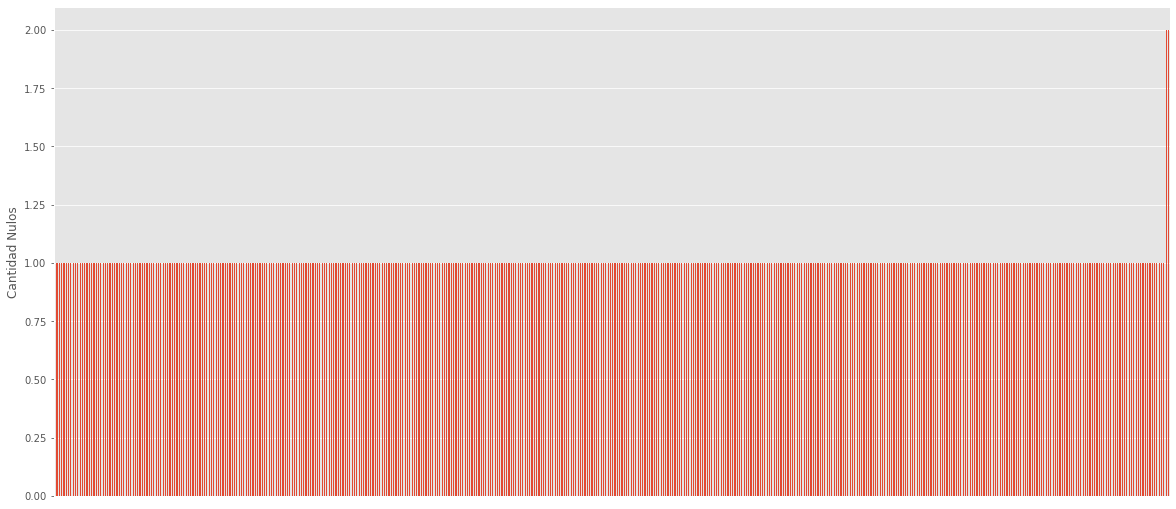

In [226]:
fig_null, ax_null = plt.subplots(nrows=1, ncols = 1, figsize = (20,9))
data_null.plot(kind = 'bar', 
               ax = ax_null)
ax_null.xaxis.set_visible(False)
#ax_null.set_xlabel('Columnas')
ax_null.set_ylabel('Cantidad Nulos')
plt.show()

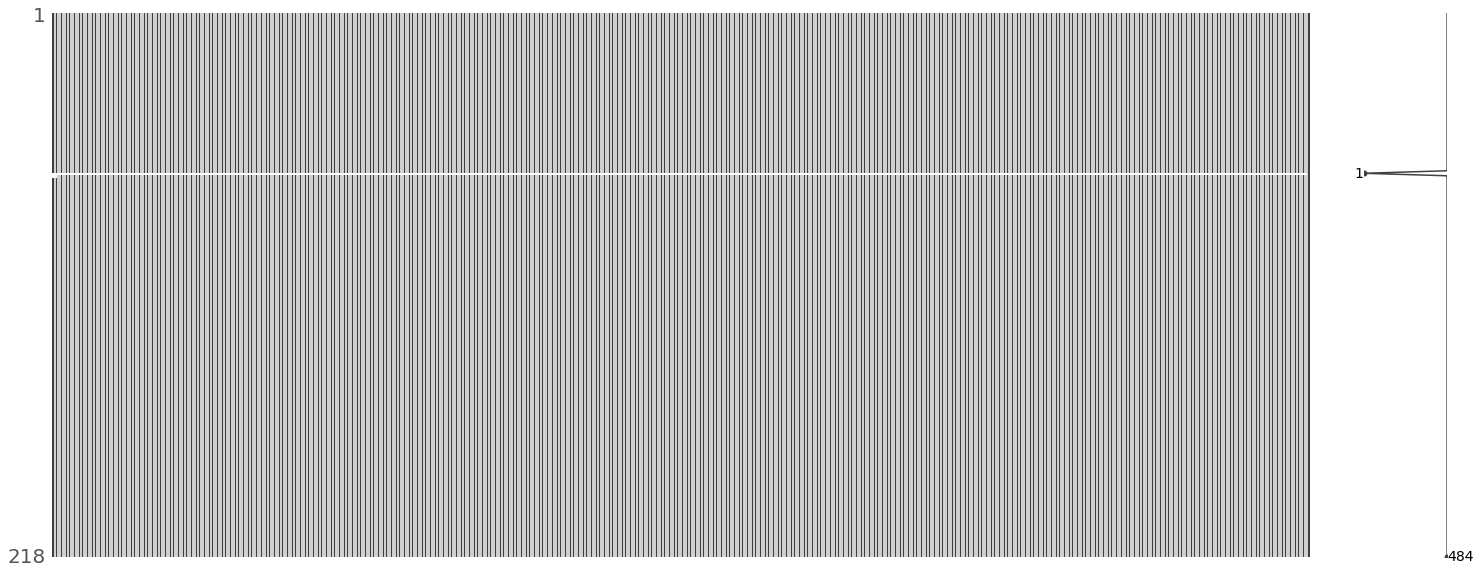

In [87]:
ax_msno = msno.matrix(data_df)
plt.show()

In [227]:
# Se eliminan datos nulos 
data_df.dropna(how = 'any', inplace = True)

In [354]:
data_df_2 = data_df.copy()
data_df_2.loc[:,'XY'] = data_df_2[['X','Y']].apply(lambda s: tuple(s), axis = 1)

In [355]:
data_df_2.drop(columns=['X','Y'], inplace = True)

In [356]:
data_df_2.head()

18-feb.  5-mar.  21-mar.  6-abr.  22-abr.  8-may.  24-may.  9-jun.  \
0   3305.0  3158.0   3038.0  2545.0   2492.0  2307.0   2510.0  2482.0   
1   3186.0  3275.0   2986.0  2616.0   2520.0  2405.0   2613.0  2742.0   
2   2942.0  2798.0   2856.0  2580.0   2327.0  2174.0   2071.0  2245.0   
3   2703.0  2627.0   2617.0  2412.0   2242.0  2198.0   2095.0  2708.0   
4   2798.0  2733.0   2642.0  2461.0   2281.0  2251.0   2125.0  2402.0   

   25-jun.  11-jul.  ...  13-sep..5  29-sep..5  15-oct..5  31-oct..5  \
0   3631.0   4870.0  ...     6421.0     5292.0     4796.0     4842.0   
1   4639.0   5309.0  ...     6477.0     5054.0     4569.0     4399.0   
2   4304.0   5301.0  ...     5745.0     4854.0     4512.0     4432.0   
3   4104.0   4618.0  ...     5393.0     4744.0     4504.0     4384.0   
4   3556.0   4422.0  ...     5393.0     4744.0     4504.0     4384.0   

   16-nov..5  2-dic..5  18-dic..5  01-ene.      CAT  \
0     4286.0    4662.0     4693.0   4746.0  ENCINAR   
1     4085.0    4353.0     4144.0   4254.0  ENCINAR   
2     4154.0    4337.0     4285.0   4329.0  ENCINAR   
3     4155.0    4377.0     4245.0   4273.0  ENCINAR   
4     4155.0    4377.0     4245.0   4273.0  ENCINAR   

                                        XY  
0                (675860.252, 3265951.876)  
1                (676300.819, 3265951.876)  
2  (676521.1020000001, 3262427.3419999997)  
3                (675419.685, 3260444.792)  
4                (675639.968, 3260444.792)  

[5 rows x 483 columns]

In [357]:
list_fechas = data_df_2.columns[:-2].values.tolist()

In [358]:
#Diccionaro fechas
dict_fechas = {'ene':'01',
               'feb':'02',
               'mar':'03',
               'abr':'04',
               'may':'05',
               'jun':'06',
               'jul':'07',
               'ago':'08',
               'sep':'09',
               'oct':'10',
               'nov':'11',
               'dic':'12'}
# Formato fechas 
fecha_format = []
year = 2000
num_mes_ini = 1
for fecha in list_fechas:
    mes = fecha.split('.')[0].split('-')[1]
    num_mes = float(dict_fechas[mes].split('.')[0])
    if num_mes < num_mes_ini:
        year += 1
    
    fecha_format.append(fecha.replace(mes, dict_fechas[mes]).split('.')[0] + '-' + str(year))
    num_mes_ini = num_mes

date_time = pd.to_datetime(fecha_format, format = '%d-%m-%Y')

In [491]:
date_time

DatetimeIndex(['2000-02-18', '2000-03-05', '2000-03-21', '2000-04-06',
               '2000-04-22', '2000-05-08', '2000-05-24', '2000-06-09',
               '2000-06-25', '2000-07-11',
               ...
               '2020-08-12', '2020-08-28', '2020-09-13', '2020-09-29',
               '2020-10-15', '2020-10-31', '2020-11-16', '2020-12-02',
               '2020-12-18', '2021-01-01'],
              dtype='datetime64[ns]', length=481, freq=None)

In [359]:
len(fecha_format), len(list_fechas)

(481, 481)

In [360]:
rename_col_fecha = dict(zip(list_fechas, fecha_format))

In [361]:
rename_col_fecha['01-ene.'], fecha_format[-1]

('01-01-2021', '01-01-2021')

In [362]:
data_df_2.rename(columns= rename_col_fecha, inplace = True)

In [363]:
data_df_2.head()

18-02-2000  5-03-2000  21-03-2000  6-04-2000  22-04-2000  8-05-2000  \
0      3305.0     3158.0      3038.0     2545.0      2492.0     2307.0   
1      3186.0     3275.0      2986.0     2616.0      2520.0     2405.0   
2      2942.0     2798.0      2856.0     2580.0      2327.0     2174.0   
3      2703.0     2627.0      2617.0     2412.0      2242.0     2198.0   
4      2798.0     2733.0      2642.0     2461.0      2281.0     2251.0   

   24-05-2000  9-06-2000  25-06-2000  11-07-2000  ...  13-09-2020  29-09-2020  \
0      2510.0     2482.0      3631.0      4870.0  ...      6421.0      5292.0   
1      2613.0     2742.0      4639.0      5309.0  ...      6477.0      5054.0   
2      2071.0     2245.0      4304.0      5301.0  ...      5745.0      4854.0   
3      2095.0     2708.0      4104.0      4618.0  ...      5393.0      4744.0   
4      2125.0     2402.0      3556.0      4422.0  ...      5393.0      4744.0   

   15-10-2020  31-10-2020  16-11-2020  2-12-2020  18-12-2020  01-01-2021  \
0      4796.0      4842.0      4286.0     4662.0      4693.0      4746.0   
1      4569.0      4399.0      4085.0     4353.0      4144.0      4254.0   
2      4512.0      4432.0      4154.0     4337.0      4285.0      4329.0   
3      4504.0      4384.0      4155.0     4377.0      4245.0      4273.0   
4      4504.0      4384.0      4155.0     4377.0      4245.0      4273.0   

       CAT                                       XY  
0  ENCINAR                (675860.252, 3265951.876)  
1  ENCINAR                (676300.819, 3265951.876)  
2  ENCINAR  (676521.1020000001, 3262427.3419999997)  
3  ENCINAR                (675419.685, 3260444.792)  
4  ENCINAR                (675639.968, 3260444.792)  

[5 rows x 483 columns]

In [375]:
data_df_3 = data_df_2.copy()
data_df_4 = data_df_3.set_index('XY')
data_df_4.head()

18-02-2000  5-03-2000  21-03-2000  \
XY                                                                           
(675860.252, 3265951.876)                    3305.0     3158.0      3038.0   
(676300.819, 3265951.876)                    3186.0     3275.0      2986.0   
(676521.1020000001, 3262427.3419999997)      2942.0     2798.0      2856.0   
(675419.685, 3260444.792)                    2703.0     2627.0      2617.0   
(675639.968, 3260444.792)                    2798.0     2733.0      2642.0   

                                         6-04-2000  22-04-2000  8-05-2000  \
XY                                                                          
(675860.252, 3265951.876)                   2545.0      2492.0     2307.0   
(676300.819, 3265951.876)                   2616.0      2520.0     2405.0   
(676521.1020000001, 3262427.3419999997)     2580.0      2327.0     2174.0   
(675419.685, 3260444.792)                   2412.0      2242.0     2198.0   
(675639.968, 3260444.792)                   2461.0      2281.0     2251.0   

                                         24-05-2000  9-06-2000  25-06-2000  \
XY                                                                           
(675860.252, 3265951.876)                    2510.0     2482.0      3631.0   
(676300.819, 3265951.876)                    2613.0     2742.0      4639.0   
(676521.1020000001, 3262427.3419999997)      2071.0     2245.0      4304.0   
(675419.685, 3260444.792)                    2095.0     2708.0      4104.0   
(675639.968, 3260444.792)                    2125.0     2402.0      3556.0   

                                         11-07-2000  ...  28-08-2020  \
XY                                                   ...               
(675860.252, 3265951.876)                    4870.0  ...      6598.0   
(676300.819, 3265951.876)                    5309.0  ...      6851.0   
(676521.1020000001, 3262427.3419999997)      5301.0  ...      6262.0   
(675419.685, 3260444.792)                    4618.0  ...      6010.0   
(675639.968, 3260444.792)                    4422.0  ...      6010.0   

                                         13-09-2020  29-09-2020  15-10-2020  \
XY                                                                            
(675860.252, 3265951.876)                    6421.0      5292.0      4796.0   
(676300.819, 3265951.876)                    6477.0      5054.0      4569.0   
(676521.1020000001, 3262427.3419999997)      5745.0      4854.0      4512.0   
(675419.685, 3260444.792)                    5393.0      4744.0      4504.0   
(675639.968, 3260444.792)                    5393.0      4744.0      4504.0   

                                         31-10-2020  16-11-2020  2-12-2020  \
XY                                                                           
(675860.252, 3265951.876)                    4842.0      4286.0     4662.0   
(676300.819, 3265951.876)                    4399.0      4085.0     4353.0   
(676521.1020000001, 3262427.3419999997)      4432.0      4154.0     4337.0   
(675419.685, 3260444.792)                    4384.0      4155.0     4377.0   
(675639.968, 3260444.792)                    4384.0      4155.0     4377.0   

                                         18-12-2020  01-01-2021      CAT  
XY                                                                        
(675860.252, 3265951.876)                    4693.0      4746.0  ENCINAR  
(676300.819, 3265951.876)                    4144.0      4254.0  ENCINAR  
(676521.1020000001, 3262427.3419999997)      4285.0      4329.0  ENCINAR  
(675419.685, 3260444.792)                    4245.0      4273.0  ENCINAR  
(675639.968, 3260444.792)                    4245.0      4273.0  ENCINAR  

[5 rows x 482 columns]

In [376]:
list_posxy = data_df_4.index.values.tolist()

In [377]:
rename_index = {index : 'posXY_'+str(i) for i, index in enumerate(list_posxy)}

In [379]:
data_df_4.rename(index = rename_index, inplace = True)
data_df_4.head()

18-02-2000  5-03-2000  21-03-2000  6-04-2000  22-04-2000  8-05-2000  \
XY                                                                             
posXY_0      3305.0     3158.0      3038.0     2545.0      2492.0     2307.0   
posXY_1      3186.0     3275.0      2986.0     2616.0      2520.0     2405.0   
posXY_2      2942.0     2798.0      2856.0     2580.0      2327.0     2174.0   
posXY_3      2703.0     2627.0      2617.0     2412.0      2242.0     2198.0   
posXY_4      2798.0     2733.0      2642.0     2461.0      2281.0     2251.0   

         24-05-2000  9-06-2000  25-06-2000  11-07-2000  ...  28-08-2020  \
XY                                                      ...               
posXY_0      2510.0     2482.0      3631.0      4870.0  ...      6598.0   
posXY_1      2613.0     2742.0      4639.0      5309.0  ...      6851.0   
posXY_2      2071.0     2245.0      4304.0      5301.0  ...      6262.0   
posXY_3      2095.0     2708.0      4104.0      4618.0  ...      6010.0   
posXY_4      2125.0     2402.0      3556.0      4422.0  ...      6010.0   

         13-09-2020  29-09-2020  15-10-2020  31-10-2020  16-11-2020  \
XY                                                                    
posXY_0      6421.0      5292.0      4796.0      4842.0      4286.0   
posXY_1      6477.0      5054.0      4569.0      4399.0      4085.0   
posXY_2      5745.0      4854.0      4512.0      4432.0      4154.0   
posXY_3      5393.0      4744.0      4504.0      4384.0      4155.0   
posXY_4      5393.0      4744.0      4504.0      4384.0      4155.0   

         2-12-2020  18-12-2020  01-01-2021      CAT  
XY                                                   
posXY_0     4662.0      4693.0      4746.0  ENCINAR  
posXY_1     4353.0      4144.0      4254.0  ENCINAR  
posXY_2     4337.0      4285.0      4329.0  ENCINAR  
posXY_3     4377.0      4245.0      4273.0  ENCINAR  
posXY_4     4377.0      4245.0      4273.0  ENCINAR  

[5 rows x 482 columns]

In [403]:
data_df_4.info()

<class 'pandas.core.frame.DataFrame'>
Index: 216 entries, posXY_0 to posXY_215
Columns: 482 entries, 18-02-2000 to CAT
dtypes: float64(481), object(1)
memory usage: 815.1+ KB


## Agrupamientos

In [428]:
data_group = data_df_4.groupby('CAT')

In [690]:
# Estadisticos: mediana y std, por grupo
data_group.agg([np.median, np.std])

18-02-2000             5-03-2000             21-03-2000              \
              median         std    median         std     median         std   
CAT                                                                             
ENCINAR       3045.0  294.169249    3202.0  365.850048     2930.0  258.733512   
MATSUB        2725.0  210.751431    2877.0  222.915013     2696.0  176.654343   
MATXERO       2220.0  202.830878    2373.5  233.957163     2164.0  231.210475   
MEZQUITAL     2385.5  284.449410    2249.5  306.671812     2304.5  213.086289   
PASTINDU      2287.0  177.847060    2563.0  199.626677     2418.0  198.150515   
PASTIZAL      2473.0  212.725669    2595.0  255.656562     2375.0  209.464875   
VEGARRO       2752.0  424.901555    3217.0  506.663037     2793.5  415.520418   

          6-04-2000             22-04-2000              ... 31-10-2020  \
             median         std     median         std  ...     median   
CAT                                                     ...              
ENCINAR      2559.0  177.938181     2329.0  133.856019  ...     4835.0   
MATSUB       2452.0  170.401562     2302.0  147.535919  ...     4117.0   
MATXERO      1989.0  213.464825     1912.5  189.722931  ...     3758.0   
MEZQUITAL    2201.0  162.099249     2075.5  179.825100  ...     4244.5   
PASTINDU     2279.0  185.272997     2127.0  160.514153  ...     3556.0   
PASTIZAL     2191.0  173.101239     2057.0  119.181417  ...     4020.0   
VEGARRO      2646.0  306.090022     2450.0  220.056016  ...     4502.5   

                      16-11-2020             2-12-2020             18-12-2020  \
                  std     median         std    median         std     median   
CAT                                                                             
ENCINAR    352.948948     4548.0  394.475186    4776.0  372.045615     4851.0   
MATSUB     312.445749     3843.0  303.364106    3927.0  330.676254     3933.0   
MATXERO    362.111860     3509.0  360.202195    3642.5  362.030373     3524.5   
MEZQUITAL  335.588240     3941.0  275.856968    4045.5  287.007085     4117.5   
PASTINDU   376.861106     3467.0  319.365778    3413.0  433.607049     3502.0   
PASTIZAL   325.119846     3865.0  333.555853    4023.0  349.948241     4098.0   
VEGARRO    392.102684     4202.0  369.676121    4481.5  434.704797     4508.0   

                      01-01-2021              
                  std     median         std  
CAT                                           
ENCINAR    401.782534     4813.0  373.763297  
MATSUB     273.201686     3981.0  329.451653  
MATXERO    350.165341     3459.0  368.563722  
MEZQUITAL  282.385316     4078.5  264.316792  
PASTINDU   369.587144     3427.0  319.729224  
PASTIZAL   299.298405     4068.0  314.923959  
VEGARRO    411.803870     4489.0  469.747226  

[7 rows x 962 columns]

In [685]:
describe_data_group = data_group.agg([np.std]).T
describe_data_group.head()

CAT                ENCINAR      MATSUB     MATXERO   MEZQUITAL    PASTINDU  \
18-02-2000 std  294.169249  210.751431  202.830878  284.449410  177.847060   
5-03-2000  std  365.850048  222.915013  233.957163  306.671812  199.626677   
21-03-2000 std  258.733512  176.654343  231.210475  213.086289  198.150515   
6-04-2000  std  177.938181  170.401562  213.464825  162.099249  185.272997   
22-04-2000 std  133.856019  147.535919  189.722931  179.825100  160.514153   

CAT               PASTIZAL     VEGARRO  
18-02-2000 std  212.725669  424.901555  
5-03-2000  std  255.656562  506.663037  
21-03-2000 std  209.464875  415.520418  
6-04-2000  std  173.101239  306.090022  
22-04-2000 std  119.181417  220.056016

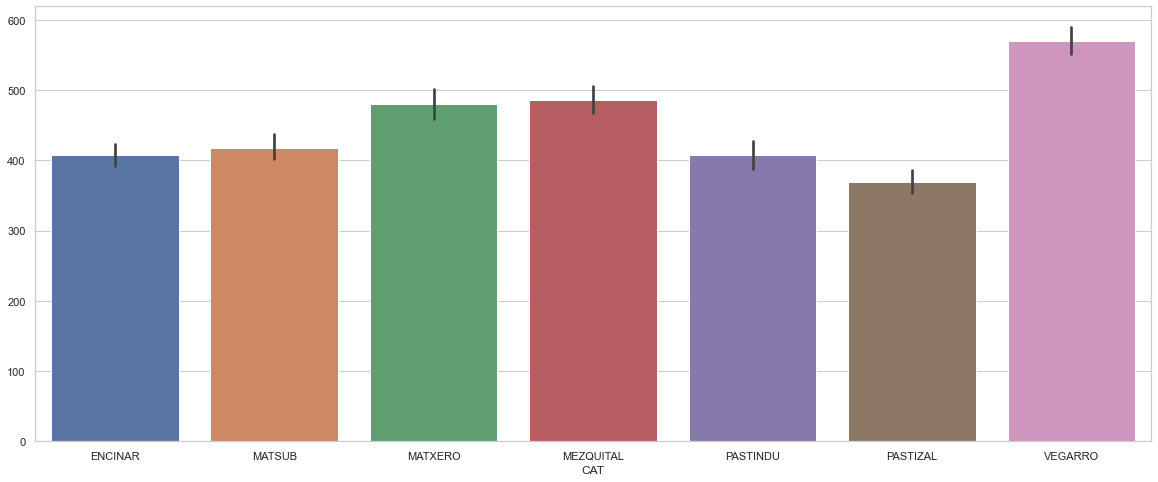

In [686]:
fig_group, ax_group = plt.subplots(nrows = 1, ncols = 1, figsize = (20,8))
sns.barplot(data = describe_data_group, ax = ax_group)
plt.show()

In [708]:
df_ENCINAR_tra = data_group.get_group('ENCINAR').iloc[:,:-1].T
date_time_encinar = pd.to_datetime(df_ENCINAR_tra.index, format = '%d-%m-%Y')
df_ENCINAR_tra.index = date_time_encinar
df_ENCINAR_tra.head()

XY          posXY_0  posXY_1  posXY_2  posXY_3  posXY_4  posXY_5  posXY_6  \
2000-02-18   3305.0   3186.0   2942.0   2703.0   2798.0   2739.0   2962.0   
2000-03-05   3158.0   3275.0   2798.0   2627.0   2733.0   2645.0   3061.0   
2000-03-21   3038.0   2986.0   2856.0   2617.0   2642.0   2580.0   2710.0   
2000-04-06   2545.0   2616.0   2580.0   2412.0   2461.0   2309.0   2409.0   
2000-04-22   2492.0   2520.0   2327.0   2242.0   2281.0   2106.0   2241.0   

XY          posXY_7  posXY_8  posXY_9  ...  posXY_23  posXY_24  posXY_25  \
2000-02-18   2641.0   2528.0   3245.0  ...    2906.0    2940.0    2913.0   
2000-03-05   2537.0   2922.0   3387.0  ...    2939.0    3268.0    3251.0   
2000-03-21   2390.0   2642.0   2937.0  ...    2747.0    2909.0    2967.0   
2000-04-06   2138.0   2444.0   2436.0  ...    2473.0    2594.0    2632.0   
2000-04-22   2173.0   2286.0   2245.0  ...    2203.0    2349.0    2378.0   

XY          posXY_26  posXY_27  posXY_28  posXY_29  posXY_30  posXY_31  \
2000-02-18    3156.0    3069.0    3035.0    3099.0    3149.0    3346.0   
2000-03-05    3613.0    3531.0    3250.0    3353.0    3363.0    3650.0   
2000-03-21    3156.0    3050.0    2956.0    3033.0    3019.0    3374.0   
2000-04-06    2726.0    2668.0    2716.0    2741.0    2781.0    2967.0   
2000-04-22    2448.0    2460.0    2388.0    2407.0    2353.0    2480.0   

XY          posXY_32  
2000-02-18    3694.0  
2000-03-05    3961.0  
2000-03-21    3278.0  
2000-04-06    2859.0  
2000-04-22    2594.0  

[5 rows x 33 columns]

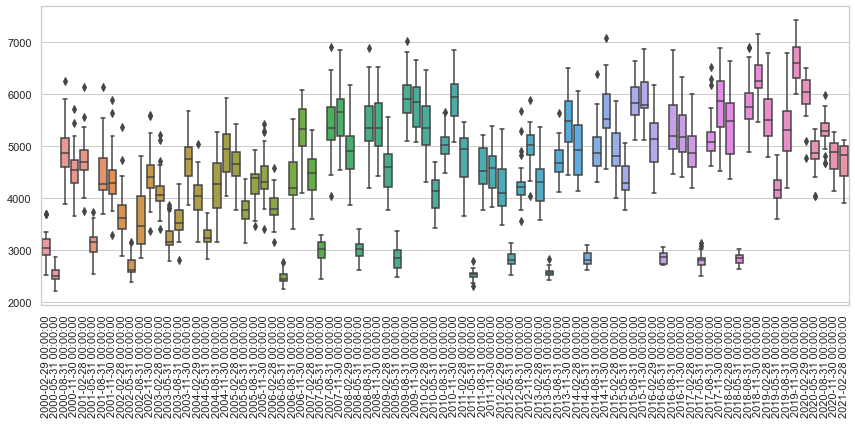

In [720]:
fig_ER, ax_ER = plt.subplots(nrows = 1, ncols = 1, figsize = (12,6))
sns.boxplot(data = df_ENCINAR_tra.resample('3M').median().T, 
            ax = ax_ER)
plt.xticks(rotation = 90)
plt.tight_layout()
plt.show() 

In [405]:
ENCINAR_df = data_group.get_group('ENCINAR')
ENCINAR_df.head()

18-02-2000  5-03-2000  21-03-2000  6-04-2000  22-04-2000  8-05-2000  \
XY                                                                             
posXY_0      3305.0     3158.0      3038.0     2545.0      2492.0     2307.0   
posXY_1      3186.0     3275.0      2986.0     2616.0      2520.0     2405.0   
posXY_2      2942.0     2798.0      2856.0     2580.0      2327.0     2174.0   
posXY_3      2703.0     2627.0      2617.0     2412.0      2242.0     2198.0   
posXY_4      2798.0     2733.0      2642.0     2461.0      2281.0     2251.0   

         24-05-2000  9-06-2000  25-06-2000  11-07-2000  ...  28-08-2020  \
XY                                                      ...               
posXY_0      2510.0     2482.0      3631.0      4870.0  ...      6598.0   
posXY_1      2613.0     2742.0      4639.0      5309.0  ...      6851.0   
posXY_2      2071.0     2245.0      4304.0      5301.0  ...      6262.0   
posXY_3      2095.0     2708.0      4104.0      4618.0  ...      6010.0   
posXY_4      2125.0     2402.0      3556.0      4422.0  ...      6010.0   

         13-09-2020  29-09-2020  15-10-2020  31-10-2020  16-11-2020  \
XY                                                                    
posXY_0      6421.0      5292.0      4796.0      4842.0      4286.0   
posXY_1      6477.0      5054.0      4569.0      4399.0      4085.0   
posXY_2      5745.0      4854.0      4512.0      4432.0      4154.0   
posXY_3      5393.0      4744.0      4504.0      4384.0      4155.0   
posXY_4      5393.0      4744.0      4504.0      4384.0      4155.0   

         2-12-2020  18-12-2020  01-01-2021      CAT  
XY                                                   
posXY_0     4662.0      4693.0      4746.0  ENCINAR  
posXY_1     4353.0      4144.0      4254.0  ENCINAR  
posXY_2     4337.0      4285.0      4329.0  ENCINAR  
posXY_3     4377.0      4245.0      4273.0  ENCINAR  
posXY_4     4377.0      4245.0      4273.0  ENCINAR  

[5 rows x 482 columns]

In [407]:
ENCINAR_df_2 = ENCINAR_df.copy()

In [412]:
ENCINAR_df_3 = ENCINAR_df_2.iloc[:,:-1].transpose()
ENCINAR_df_3.head()

XY          posXY_0  posXY_1  posXY_2  posXY_3  posXY_4  posXY_5  posXY_6  \
18-02-2000   3305.0   3186.0   2942.0   2703.0   2798.0   2739.0   2962.0   
5-03-2000    3158.0   3275.0   2798.0   2627.0   2733.0   2645.0   3061.0   
21-03-2000   3038.0   2986.0   2856.0   2617.0   2642.0   2580.0   2710.0   
6-04-2000    2545.0   2616.0   2580.0   2412.0   2461.0   2309.0   2409.0   
22-04-2000   2492.0   2520.0   2327.0   2242.0   2281.0   2106.0   2241.0   

XY          posXY_7  posXY_8  posXY_9  ...  posXY_23  posXY_24  posXY_25  \
18-02-2000   2641.0   2528.0   3245.0  ...    2906.0    2940.0    2913.0   
5-03-2000    2537.0   2922.0   3387.0  ...    2939.0    3268.0    3251.0   
21-03-2000   2390.0   2642.0   2937.0  ...    2747.0    2909.0    2967.0   
6-04-2000    2138.0   2444.0   2436.0  ...    2473.0    2594.0    2632.0   
22-04-2000   2173.0   2286.0   2245.0  ...    2203.0    2349.0    2378.0   

XY          posXY_26  posXY_27  posXY_28  posXY_29  posXY_30  posXY_31  \
18-02-2000    3156.0    3069.0    3035.0    3099.0    3149.0    3346.0   
5-03-2000     3613.0    3531.0    3250.0    3353.0    3363.0    3650.0   
21-03-2000    3156.0    3050.0    2956.0    3033.0    3019.0    3374.0   
6-04-2000     2726.0    2668.0    2716.0    2741.0    2781.0    2967.0   
22-04-2000    2448.0    2460.0    2388.0    2407.0    2353.0    2480.0   

XY          posXY_32  
18-02-2000    3694.0  
5-03-2000     3961.0  
21-03-2000    3278.0  
6-04-2000     2859.0  
22-04-2000    2594.0  

[5 rows x 33 columns]

In [413]:
ENCINAR_df_3.rename_axis('Fecha', axis = 'index', inplace = True)
ENCINAR_df_3.head()

XY          posXY_0  posXY_1  posXY_2  posXY_3  posXY_4  posXY_5  posXY_6  \
Fecha                                                                       
18-02-2000   3305.0   3186.0   2942.0   2703.0   2798.0   2739.0   2962.0   
5-03-2000    3158.0   3275.0   2798.0   2627.0   2733.0   2645.0   3061.0   
21-03-2000   3038.0   2986.0   2856.0   2617.0   2642.0   2580.0   2710.0   
6-04-2000    2545.0   2616.0   2580.0   2412.0   2461.0   2309.0   2409.0   
22-04-2000   2492.0   2520.0   2327.0   2242.0   2281.0   2106.0   2241.0   

XY          posXY_7  posXY_8  posXY_9  ...  posXY_23  posXY_24  posXY_25  \
Fecha                                  ...                                 
18-02-2000   2641.0   2528.0   3245.0  ...    2906.0    2940.0    2913.0   
5-03-2000    2537.0   2922.0   3387.0  ...    2939.0    3268.0    3251.0   
21-03-2000   2390.0   2642.0   2937.0  ...    2747.0    2909.0    2967.0   
6-04-2000    2138.0   2444.0   2436.0  ...    2473.0    2594.0    2632.0   
22-04-2000   2173.0   2286.0   2245.0  ...    2203.0    2349.0    2378.0   

XY          posXY_26  posXY_27  posXY_28  posXY_29  posXY_30  posXY_31  \
Fecha                                                                    
18-02-2000    3156.0    3069.0    3035.0    3099.0    3149.0    3346.0   
5-03-2000     3613.0    3531.0    3250.0    3353.0    3363.0    3650.0   
21-03-2000    3156.0    3050.0    2956.0    3033.0    3019.0    3374.0   
6-04-2000     2726.0    2668.0    2716.0    2741.0    2781.0    2967.0   
22-04-2000    2448.0    2460.0    2388.0    2407.0    2353.0    2480.0   

XY          posXY_32  
Fecha                 
18-02-2000    3694.0  
5-03-2000     3961.0  
21-03-2000    3278.0  
6-04-2000     2859.0  
22-04-2000    2594.0  

[5 rows x 33 columns]

In [415]:
ENCINAR_df_3.info()

<class 'pandas.core.frame.DataFrame'>
Index: 481 entries, 18-02-2000 to 01-01-2021
Data columns (total 33 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   posXY_0   481 non-null    float64
 1   posXY_1   481 non-null    float64
 2   posXY_2   481 non-null    float64
 3   posXY_3   481 non-null    float64
 4   posXY_4   481 non-null    float64
 5   posXY_5   481 non-null    float64
 6   posXY_6   481 non-null    float64
 7   posXY_7   481 non-null    float64
 8   posXY_8   481 non-null    float64
 9   posXY_9   481 non-null    float64
 10  posXY_10  481 non-null    float64
 11  posXY_11  481 non-null    float64
 12  posXY_12  481 non-null    float64
 13  posXY_13  481 non-null    float64
 14  posXY_14  481 non-null    float64
 15  posXY_15  481 non-null    float64
 16  posXY_16  481 non-null    float64
 17  posXY_17  481 non-null    float64
 18  posXY_18  481 non-null    float64
 19  posXY_19  481 non-null    float64
 20  posXY_20  481 non-nul

In [416]:
(ENCINAR_df_3.isnull().sum(axis = 0) == 0).all()

True

In [419]:
round(ENCINAR_df_3.describe(),2)

XY     posXY_0  posXY_1  posXY_2  posXY_3  posXY_4  posXY_5  posXY_6  posXY_7  \
count   481.00   481.00   481.00   481.00   481.00   481.00   481.00   481.00   
mean   4350.10  4664.57  4177.60  4204.78  4158.92  4065.56  4512.43  4282.02   
std    1234.08  1425.21  1298.39  1208.22  1131.70  1215.21  1338.37  1277.91   
min    2230.00  2307.00  2071.00  2080.00  2109.00  1949.00  2021.00  2029.00   
25%    3222.00  3405.00  3102.00  3189.00  3240.00  3022.00  3432.00  3205.00   
50%    4467.00  4667.00  4090.00  4275.00  4253.00  4020.00  4618.00  4278.00   
75%    5257.00  5701.00  5031.00  5082.00  5066.00  4979.00  5502.00  5262.00   
max    7255.00  7796.00  7776.00  6996.00  6651.00  6907.00  7527.00  6916.00   

XY     posXY_8  posXY_9  ...  posXY_23  posXY_24  posXY_25  posXY_26  \
count   481.00   481.00  ...    481.00    481.00    481.00    481.00   
mean   4632.76  4399.29  ...   4199.84   4609.76   4490.73   4602.36   
std    1472.98  1218.38  ...   1193.42   1416.37   1340.87   1392.23   
min    2237.00  2033.00  ...   2109.00   2058.00   2134.00   2020.00   
25%    3405.00  3309.00  ...   3228.00   3321.00   3306.00   3346.00   
50%    4612.00  4639.00  ...   4295.00   4718.00   4547.00   4745.00   
75%    5705.00  5353.00  ...   5049.00   5823.00   5661.00   5781.00   
max    7939.00  6831.00  ...   6738.00   7357.00   7249.00   7194.00   

XY     posXY_27  posXY_28  posXY_29  posXY_30  posXY_31  posXY_32  
count    481.00    481.00    481.00    481.00    481.00    481.00  
mean    4673.76   4398.42   4305.06   4341.10   4871.16   5017.09  
std     1411.87   1244.54   1187.00   1223.03   1441.23   1558.26  
min     2070.00   2135.00   2156.00   2032.00   2295.00   2184.00  
25%     3414.00   3380.00   3353.00   3286.00   3700.00   3683.00  
50%     4828.00   4496.00   4405.00   4485.00   5028.00   5219.00  
75%     5857.00   5432.00   5219.00   5282.00   5933.00   6382.00  
max     7304.00   7138.00   6805.00   6753.00   7812.00   7856.00  

[8 rows x 33 columns]

In [420]:
ENCINAR_corr = ENCINAR_df_3.corr(method = 'pearson')

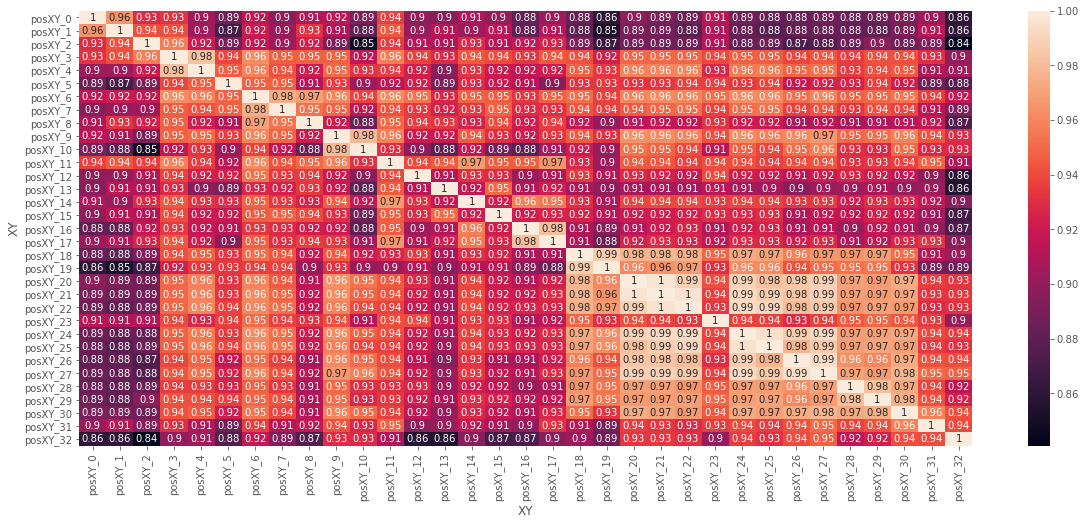

In [421]:
fig_corr, ax_corr = plt.subplots(nrows=1, ncols=1, figsize = (20,8))
sns.heatmap(ENCINAR_corr, annot=True, ax = ax_corr)
plt.show()

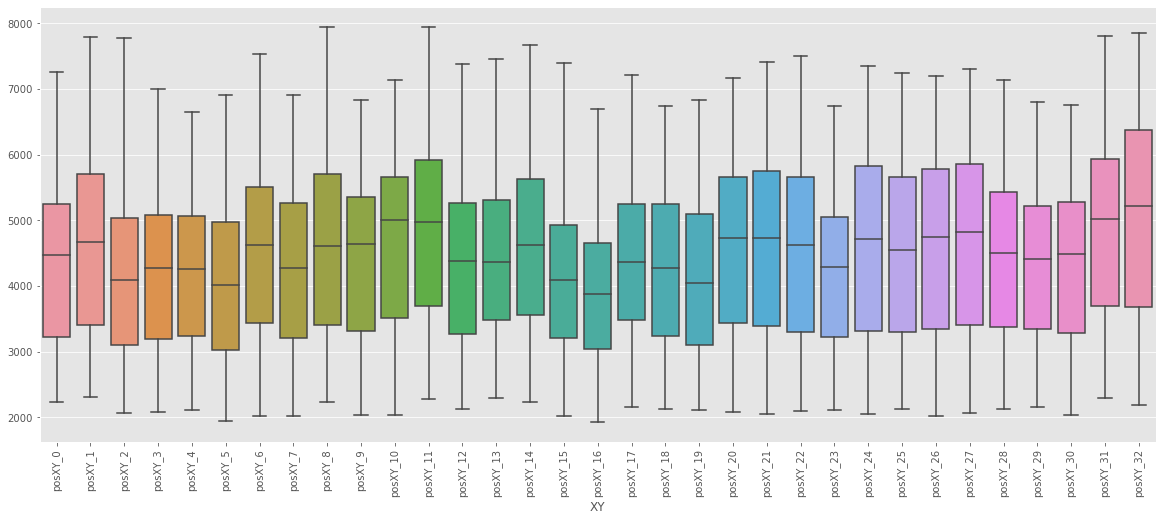

In [464]:
fig_box_E, ax_box_E = plt.subplots(nrows=1, ncols = 1, figsize= (20,8))
sns.boxplot(data = ENCINAR_df_3, ax = ax_box_E)
#plt.tight_layout()
plt.xticks(rotation = 90)
plt.show()

In [466]:
ENCINAR_df_3.index = date_time

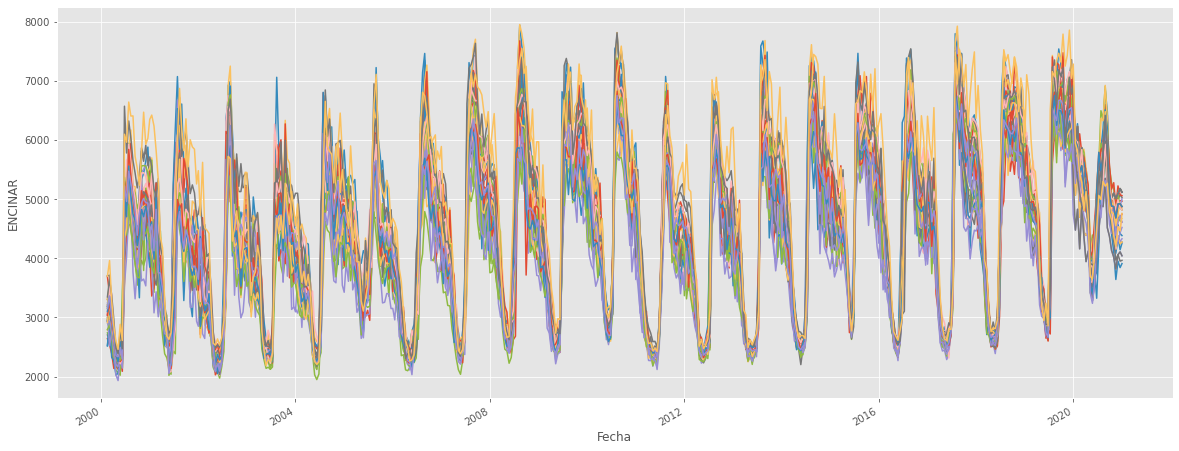

In [469]:
ax_trend = ENCINAR_df_3.plot(kind = 'line', 
                             subplots = False,
                             sharex = True,
                             figsize = (20,8),
                             legend = False)
ax_trend.set_xlabel('Fecha')
ax_trend.set_ylabel('ENCINAR')
plt.show()

## Tendencias por categoría

In [471]:
def ts_group(df_group, cat):
    list_df_group = []
    for element in cat:
        df_ = df_group.get_group(element)
        df_T = df_.iloc[:,:-1].transpose()
        df_T.rename_axis('Fecha', axis = 'index', inplace = True)
        list_df_group.append(df_T)
        
    return list_df_group
    

In [472]:
file_list

['ENCINAR.csv',
 'MATSUB.csv',
 'MATXERO.csv',
 'MEZQUITAL.csv',
 'PASTINDU.csv',
 'PASTIZAL.csv',
 'VEGARRO.csv']

In [476]:
list_groups = ts_group(data_group, CAT)

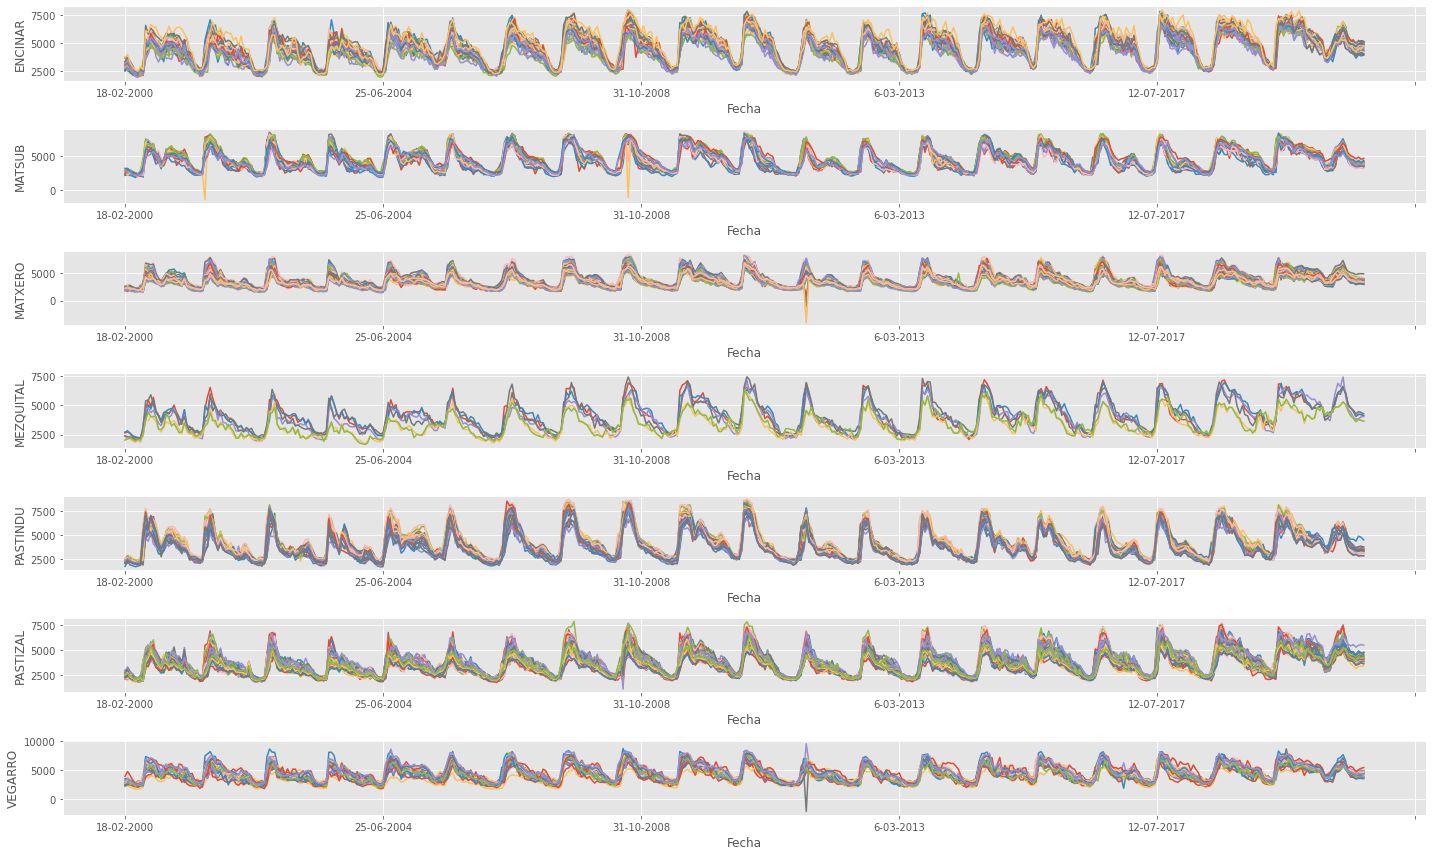

In [481]:
fig_groups, ax_groups = plt.subplots(nrows = len(CAT), ncols = 1, figsize = (20,12))
for k, df_cat in enumerate(list_groups):
    df_cat.plot(kind = 'line', 
                legend = False, 
                ax = ax_groups[k])
    ax_groups[k].set_xlabel('Fecha')
    ax_groups[k].set_ylabel(CAT[k])
plt.tight_layout()
plt.show()

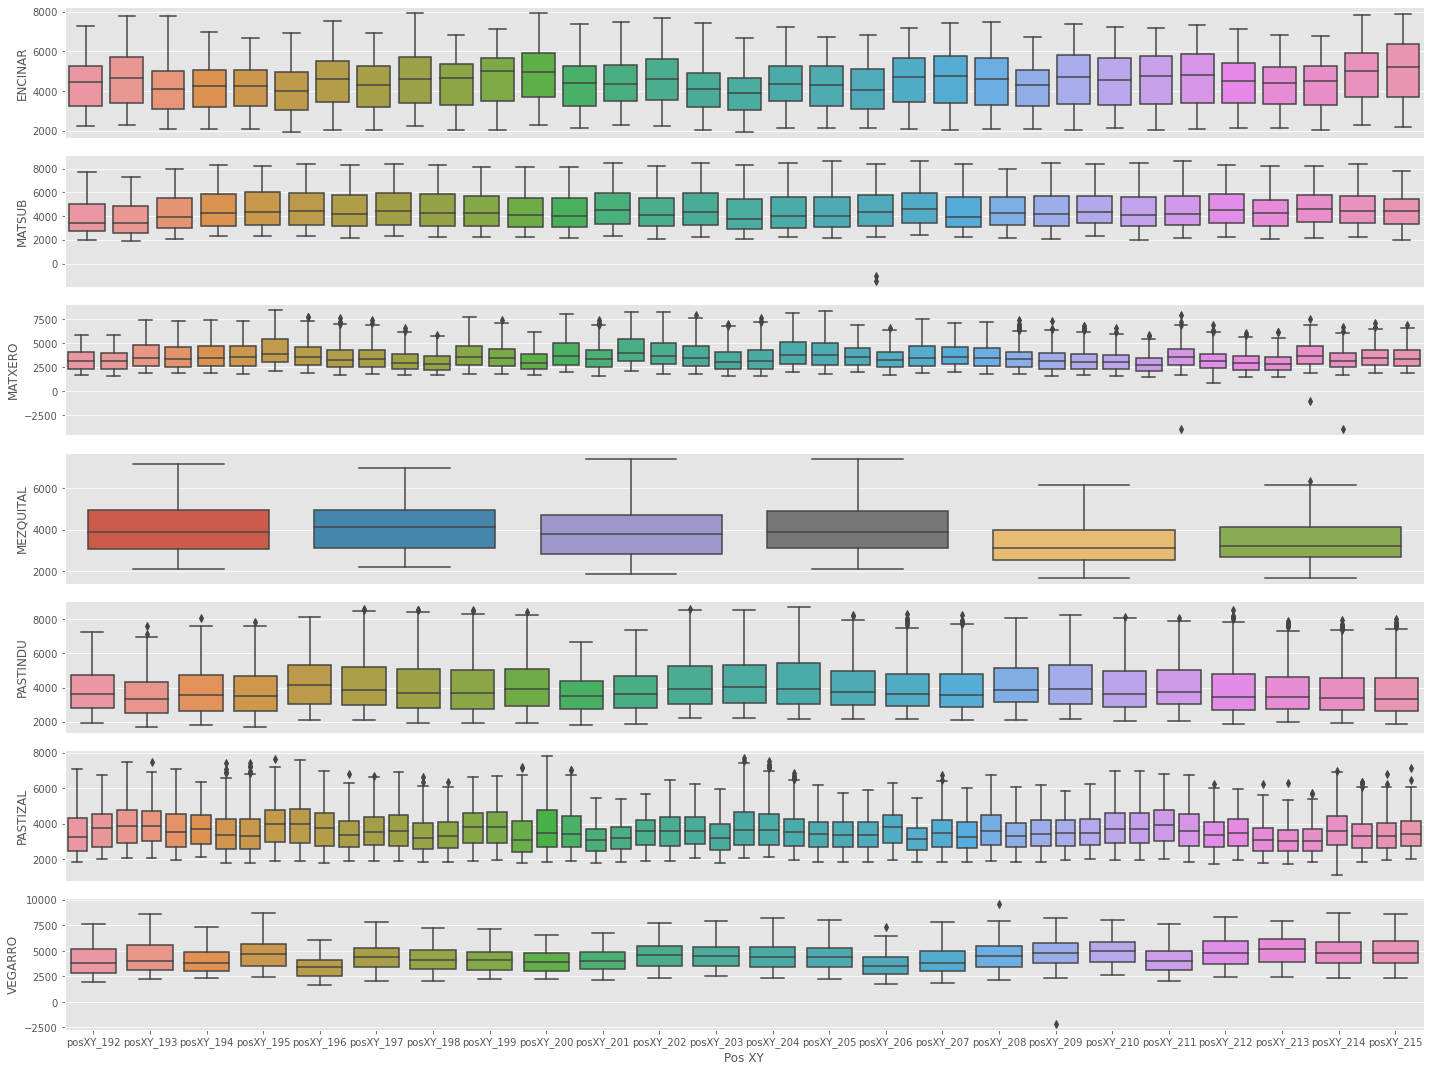

In [678]:
# subplots con conjunto de boxplots por posicion XY
fig_box_groups, ax_box_groups = plt.subplots(nrows = len(CAT), ncols = 1, figsize = (20,15))
for k, df_cat in enumerate(list_groups):
    sns.boxplot(data = df_cat, ax = ax_box_groups[k])
    # df_cat.plot(kind = 'box', 
    #             legend = False, 
    #             ax = ax_box_groups[k])
    if k == len(CAT)-1:
        ax_box_groups[k].set_xlabel('Pos XY')
    else:
        ax_box_groups[k].xaxis.set_visible(False)
    
    ax_box_groups[k].set_ylabel(CAT[k])
plt.tight_layout()
plt.show()

## Detección de outliers
* Metódo Univariado
* Metódo Multivariado *MCD*

In [556]:
def filt_out(list_df):
    df_filt_out = []
    for df in list_df:
        Q1 = df.quantile(0.25)
        Q3 = df.quantile(0.75)
        IQR = Q3-Q1
        lim_max = Q3 + 1.5*IQR
        lim_inf = Q1 - 1.5*IQR
        df_filt_out.append(df[(df<lim_max) & (df>lim_inf)])
    return df_filt_out


In [557]:
df_list_out = filt_out(list_groups)

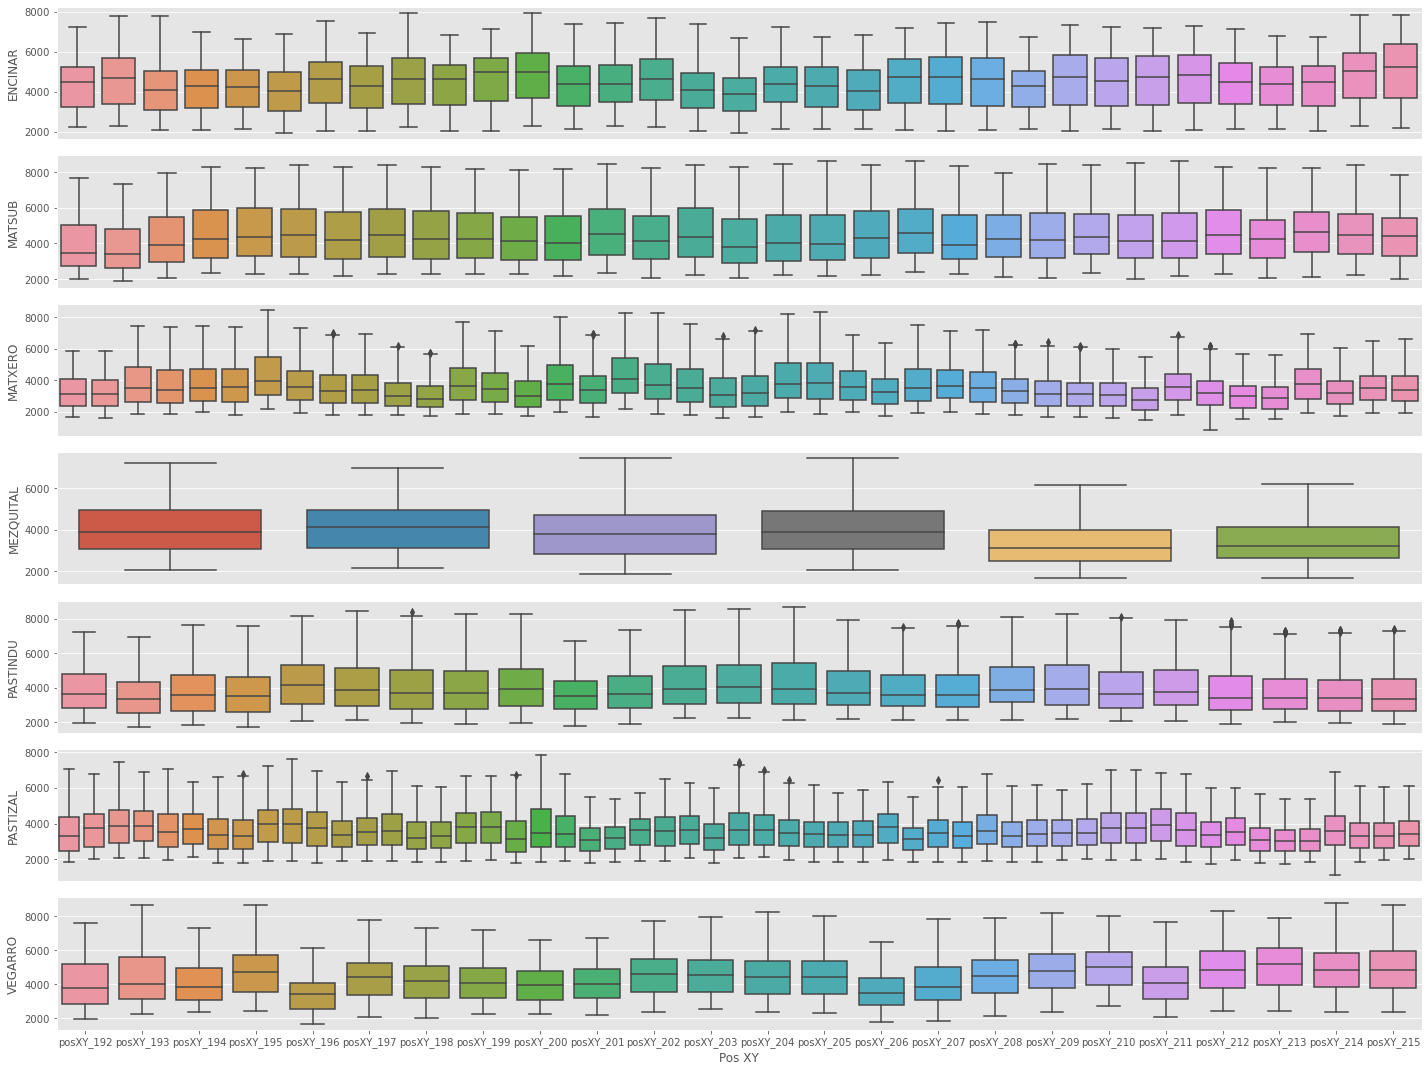

In [681]:
fig_box_out, ax_box_out = plt.subplots(nrows = len(CAT), ncols = 1, figsize = (20,15))
for k, df_cat in enumerate(df_list_out):
    # df_cat.plot(kind = 'box', 
    #             legend = False, 
    #             ax = ax_box_out[k])
    sns.boxplot(data = df_cat, ax = ax_box_out[k])
    if k == len(CAT)-1:
        ax_box_out[k].set_xlabel('Pos XY')
    else:
        ax_box_out[k].xaxis.set_visible(False)
    
    ax_box_out[k].set_ylabel(CAT[k])

plt.tight_layout()
plt.show()

## Imputación de valores faltantes
* Metódo de interpolación

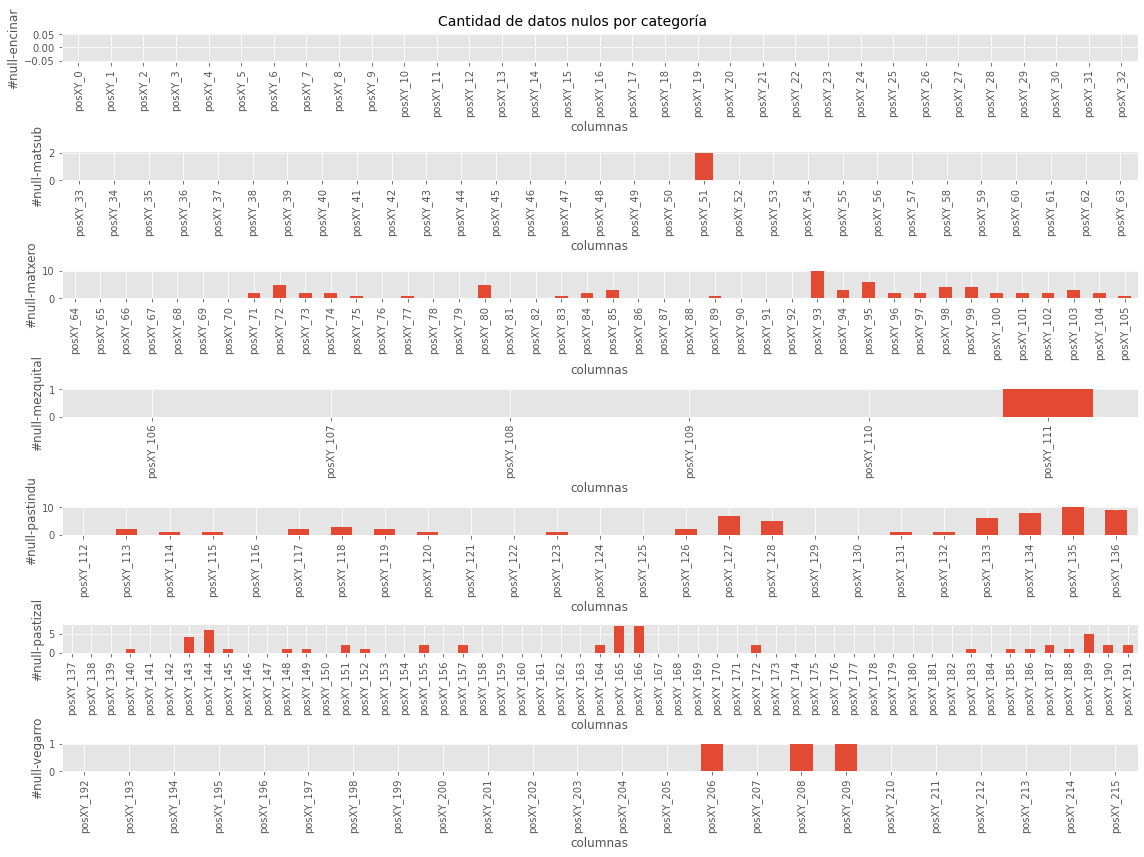

In [585]:
# Subplots con la cantidad de datos nulos
fig_null_, ax_null_ = plt.subplots(nrows = len(CAT), ncols = 1, figsize = (16,12))
fig_null_.suptitle('Cantidad de datos nulos por categoría', fontsize = 14)
for i, df_cat in enumerate(df_list_out):
    df_cat.isnull().sum(axis = 0).plot(kind = 'bar',
                                       ylabel = '#null-' + str(CAT[i]).lower(),
                                       xlabel = 'columnas',
                                       ax = ax_null_[i]
                                       )
    # if i == len(CAT)-1:
    #     ax_na_out[i].set_xlabel('columnas')
    # else:
    #     ax_na_out[i].xaxis.set_visible(False)

plt.tight_layout()
plt.show()

In [590]:
# Imputación por interpolación lineal
df_list_imp = []
for df_cat in df_list_out:
    df_cat.index = pd.to_datetime(df_cat.index, format = '%d-%m-%Y')
    df_imp = df_cat.interpolate(method = 'linear')
    df_list_imp.append(df_imp)

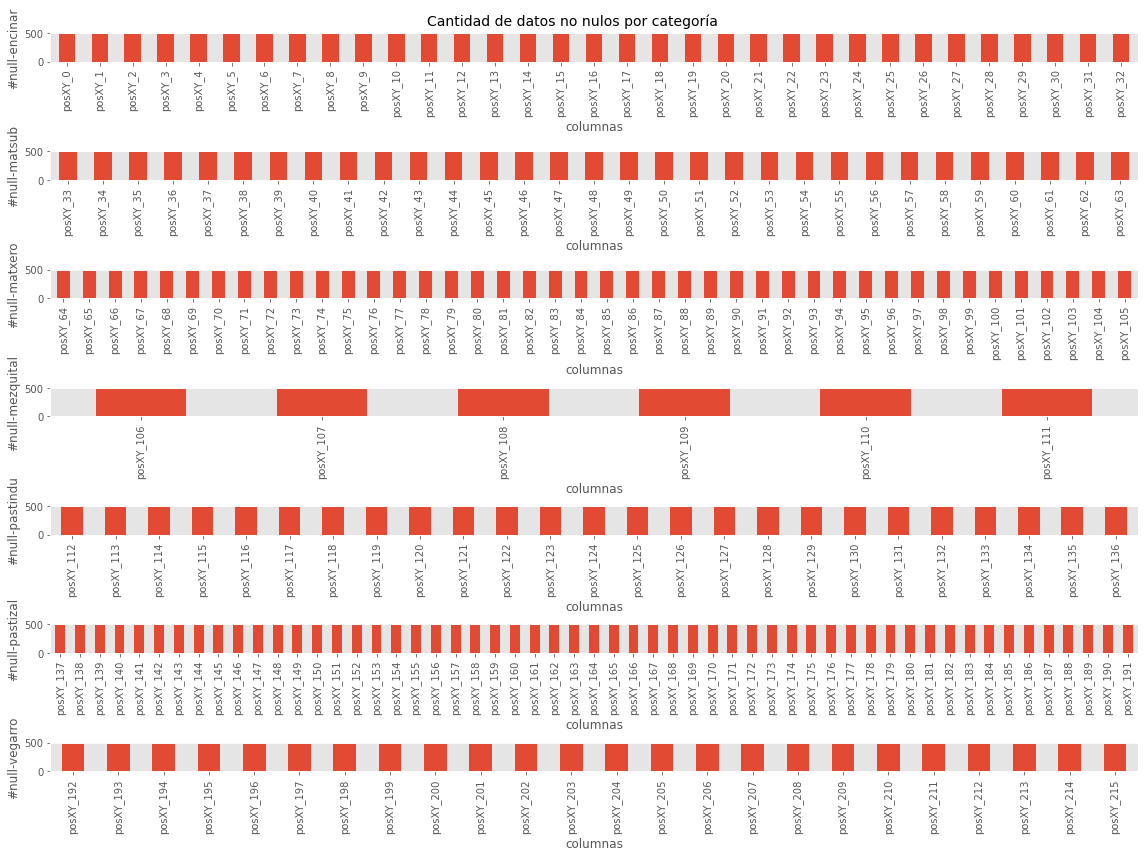

In [593]:
# Subplots con la cantidad de datos nulos despues de imputación
fig_null_imp, ax_null_imp = plt.subplots(nrows = len(CAT), ncols = 1, figsize = (16,12))
fig_null_imp.suptitle('Cantidad de datos no nulos por categoría', fontsize = 14)
for i, df_cat in enumerate(df_list_imp):
    df_cat.notnull().sum(axis = 0).plot(kind = 'bar',
                                       ylabel = '#null-' + str(CAT[i]).lower(),
                                       xlabel = 'columnas',
                                       ax = ax_null_imp[i]
                                       )
    # if i == len(CAT)-1:
    #     ax_na_out[i].set_xlabel('columnas')
    # else:
    #     ax_na_out[i].xaxis.set_visible(False)

plt.tight_layout()
plt.show()

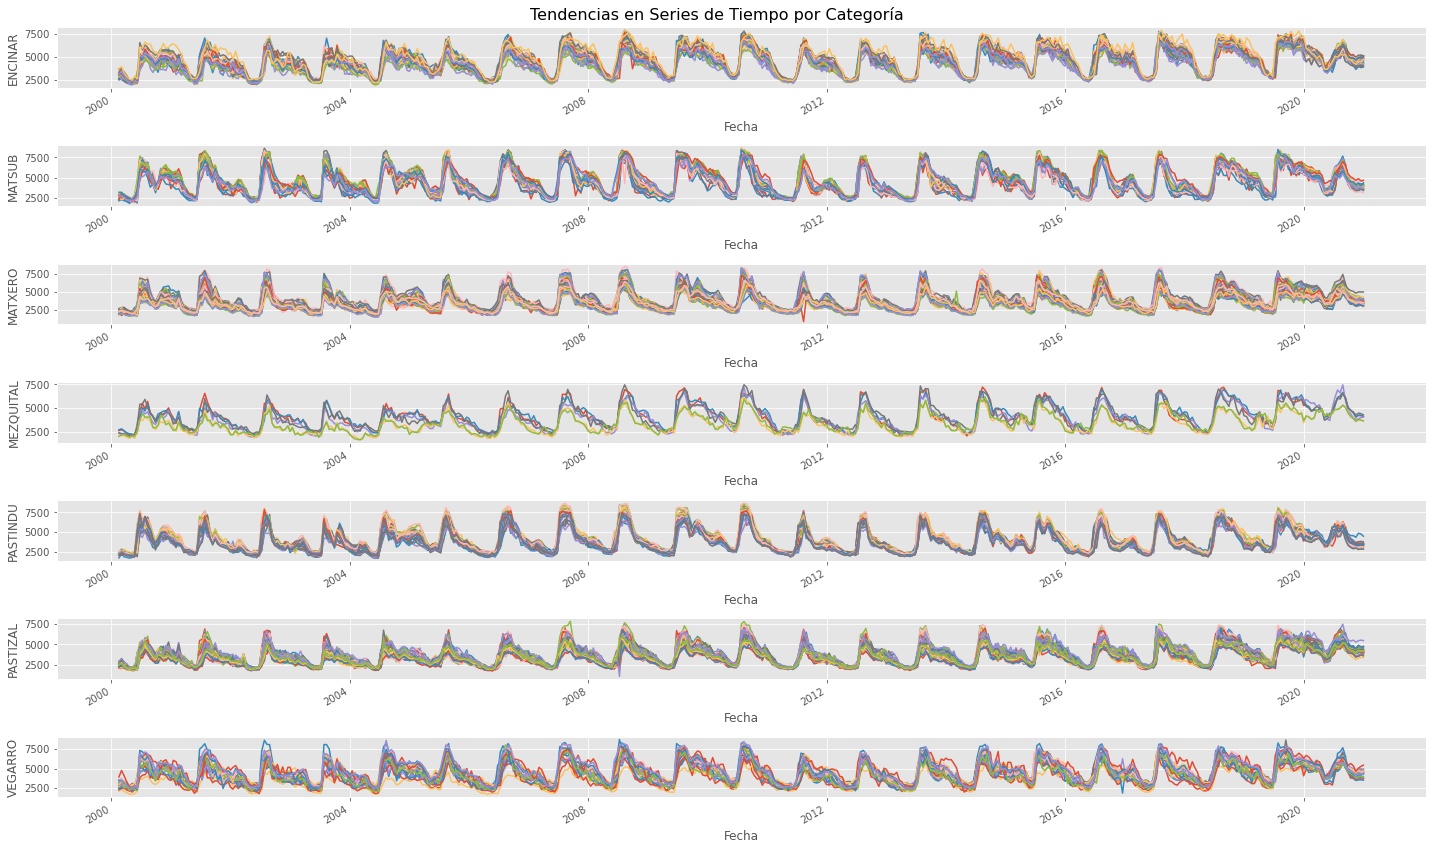

In [595]:
# Subplots con las tendencias en series de tiempo imputadas por interpolación lineal por categoría
fig_imp, ax_imp = plt.subplots(nrows = len(CAT), ncols = 1, figsize = (20,12))
fig_imp.suptitle('Tendencias en Series de Tiempo por Categoría', fontsize = 16)
for k, df_cat in enumerate(df_list_imp):
    df_cat.plot(kind = 'line', 
                legend = False, 
                ax = ax_imp[k])
    ax_imp[k].set_xlabel('Fecha')
    ax_imp[k].set_ylabel(CAT[k])

plt.tight_layout()
plt.show()

In [599]:
def ts_freq(list_df):
    df_asfreq_list = []
    for df in list_df:
        df_asfreq =df.asfreq(freq = '16D', method = 'ffill')
        df_asfreq_list.append(df_asfreq)
    return df_asfreq_list

In [600]:
list_asfreq_df = ts_freq(df_list_imp)

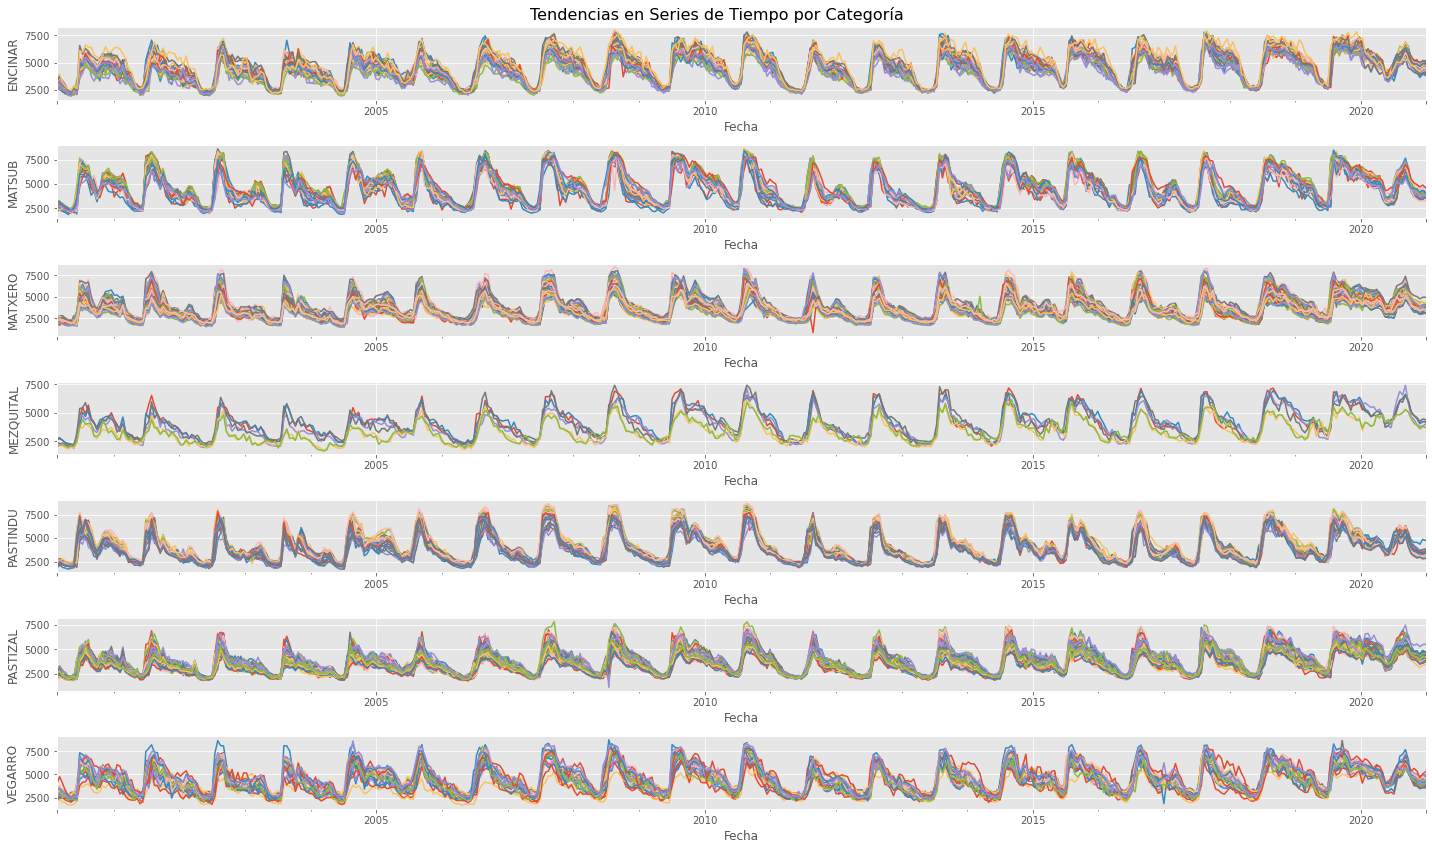

In [607]:
# Subplots con las tendencias en series de tiempo transformadas a una frecuencia de 8 días.
fig_imp_freq, ax_imp_freq = plt.subplots(nrows = len(CAT), ncols = 1, figsize = (20,12))
fig_imp_freq.suptitle('Tendencias en Series de Tiempo por Categoría', fontsize = 16)
for k, df_cat in enumerate(list_asfreq_df):
    df_cat.plot(kind = 'line', 
                legend = False, 
                ax = ax_imp_freq[k])
    ax_imp_freq[k].set_xlabel('Fecha')
    ax_imp_freq[k].set_ylabel(CAT[k])

plt.tight_layout()
plt.show()

In [634]:
trend_list, seasonal_list, residual_list = [], [], []

dict_cat , dict_serie = {}, {}
for cat in CAT:
    dict_cat[cat] = {}
    
for k, df_cat in enumerate(list_asfreq_df):
    dict_cat[CAT[k]] = df_cat.apply(lambda s: seasonal_decompose(s, model = 'additive'), axis = 0)

In [676]:
%matplotlib inline

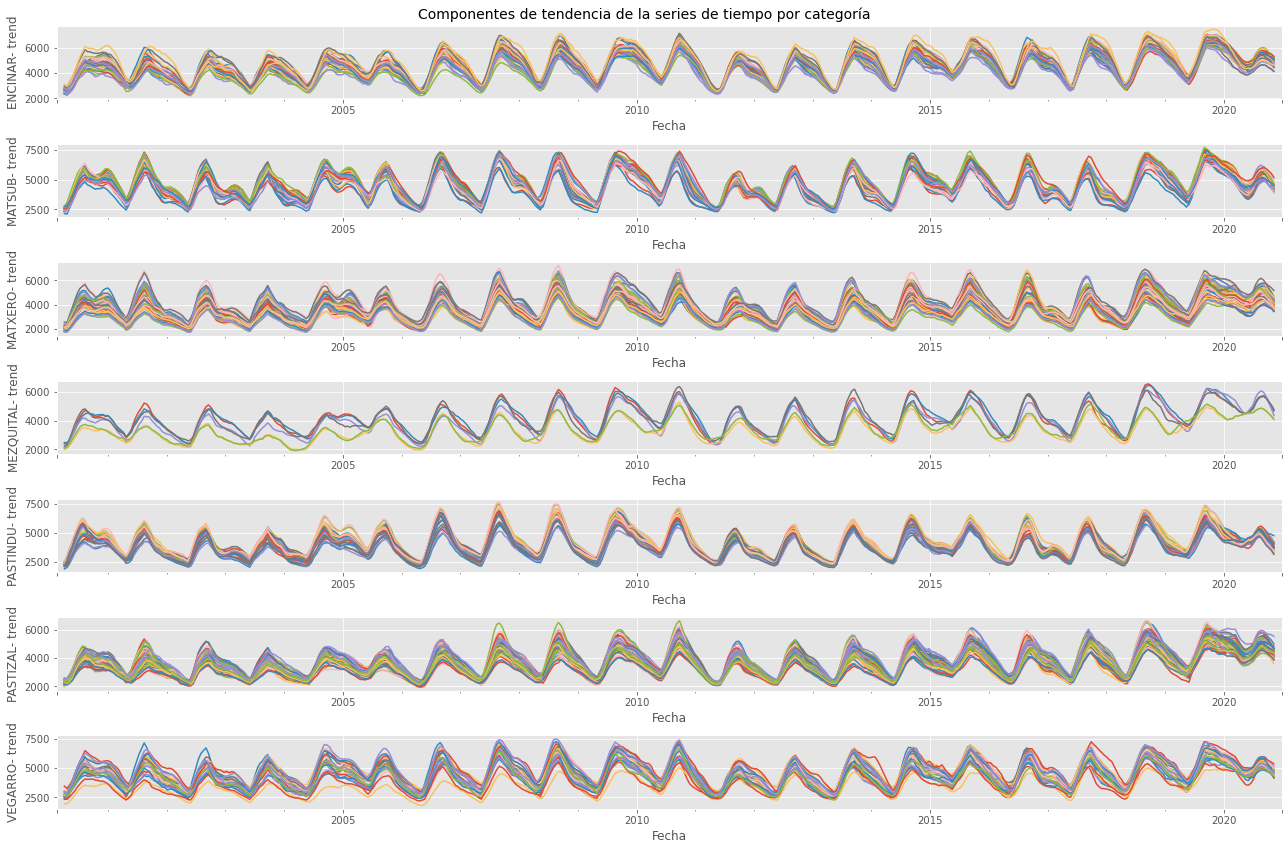

In [677]:
fig_trend, ax_trend = plt.subplots(nrows = len(CAT), ncols = 1, figsize = (18,12))
fig_trend.suptitle('Componentes de tendencia de la series de tiempo por categoría', fontsize = 14)
for j, cat in enumerate(CAT):
    for pos in dict_cat[cat].index.values.tolist():
        dict_cat.get(cat).get(pos).trend.plot(kind = 'line', 
                                              ax = ax_trend[j])
    ax_trend[j].set_ylabel(cat + '- trend')
plt.tight_layout()
plt.show()


In [756]:
df_encinos = list_asfreq_df[0]
ts_decompose_pos0 = seasonal_decompose(df_encinos.iloc[:,0],
                   model = 'multiplicative')
ax_ = ts_decompose_pos0.plot()
plt.show()

In [738]:
#fig_box_cat, ax_box_cat = plt.subplots(nrows = len(CAT), ncols = 1, figsize = (12,8))
df_cat_median = pd.DataFrame()
for k, df_ in enumerate(list_asfreq_df):
    df_cat_median[CAT[k]] = df_.apply(lambda s: s.median(), axis = 1)

<AxesSubplot:>

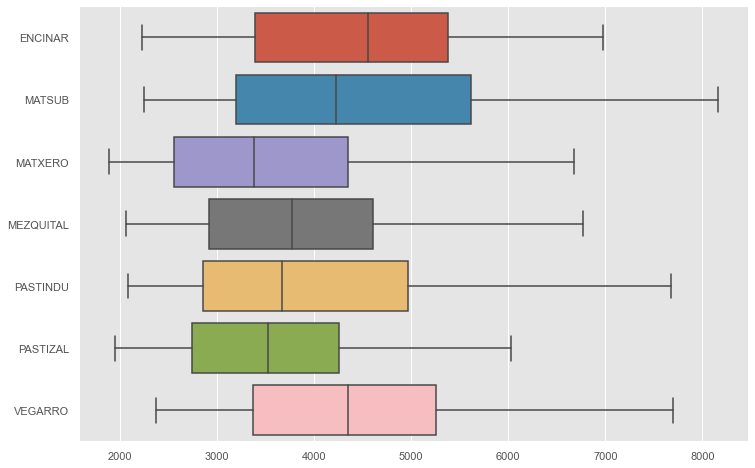

In [741]:
fig_box_cat, ax_box_cat = plt.subplots(nrows = 1, ncols = 1, figsize = (12,8))
sns.boxplot(data = df_cat_median, ax = ax_box_cat, orient= 'h')

<AxesSubplot:>

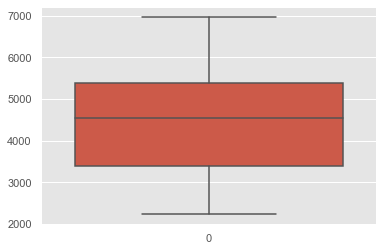

In [735]:
sns.boxplot(data = list_asfreq_df[0].apply(lambda s: s.median(), axis = 1), orient= 'v')

In [745]:
y_st = df_encinos.iloc[:,0].values

In [751]:
T = 16
N = len(y_st)
yf = fft(y_st)
xf = fftfreq(N, 1/T)[:N//2]

In [757]:
len(y_st)

477

In [754]:
%matplotlib qt

In [755]:
plt.plot(xf, 2.0/N * np.abs(yf[0:N//2]))
plt.grid(True)
plt.show()

In [4]:
path_rlm = './RLM.csv'
data_rlm = pd.read_csv(path_rlm, sep = ',', index_col = False, encoding = 'utf-8')
data_rlm.head()

X1   x2   Y
0   3  135  89
1   4  120  90
2   3  100  83
3   2  105  77
4   4  130  92

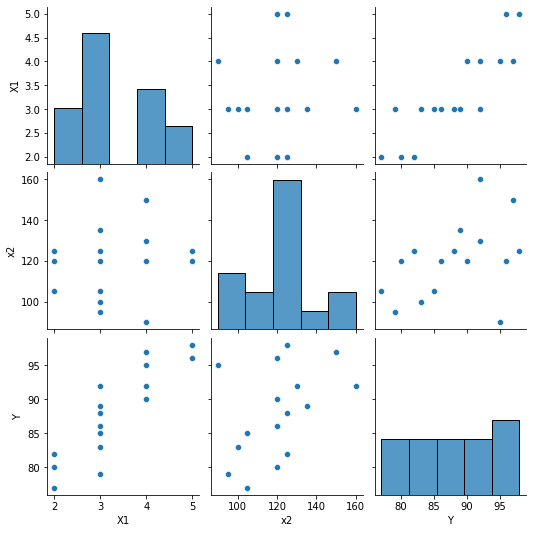

In [7]:
ax_scatter = sns.pairplot(data = data_rlm)
plt.show()

In [10]:
data_rlm.describe()

X1        x2          Y
count  16.000000   16.0000  16.000000
mean    3.312500  120.3125  88.062500
std     0.946485   18.7500   6.687987
min     2.000000   90.0000  77.000000
25%     3.000000  105.0000  82.750000
50%     3.000000  120.0000  88.500000
75%     4.000000  126.2500  92.750000
max     5.000000  160.0000  98.000000

In [12]:
data_rlm.corr(method ='pearson')

X1        x2         Y
X1  1.000000  0.106828  0.870842
x2  0.106828  1.000000  0.441089
Y   0.870842  0.441089  1.000000

In [13]:
0.87**2

0.7569

In [8]:
rlm_ = smf.ols(formula = 'Y~X1+x2', data = data_rlm).fit()

In [16]:
y_hat= rlm_.predict(data_rlm[['X1', 'x2']])

In [18]:
error = data_rlm['Y'] - y_hat

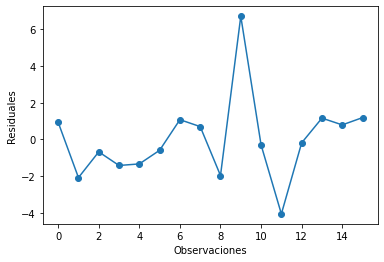

In [23]:
plt.figure()
plt.plot(error, marker = 'o')
plt.ylabel('Residuales')
plt.xlabel('Observaciones')
plt.show()

In [24]:
error.mean()

1.7053025658242404e-13

In [9]:
rlm_.summary()

C:\Users\Samuel\AppData\Roaming\Python\Python37\site-packages\scipy\stats\stats.py:1535: UserWarning: kurtosistest only valid for n>=20 ... continuing anyway, n=16
  "anyway, n=%i" % int(n))


<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                      Y   R-squared:                       0.881
Model:                            OLS   Adj. R-squared:                  0.863
Method:                 Least Squares   F-statistic:                     48.08
Date:                Sat, 12 Feb 2022   Prob (F-statistic):           9.84e-07
Time:                        09:00:54   Log-Likelihood:                -35.569
No. Observations:                  16   AIC:                             77.14
Df Residuals:                      13   BIC:                             79.46
Df Model:                           2                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept     53.4502      4.532     11.794      0.000      43.660      63.241
X1             5.8877      0.680      8.656      0.000       4.418       7.357
x2             0.1256      0.034      3.657      0.003       0.051       0.200
==============================================================================
Omnibus:                       11.884   Durbin-Watson:                   2.214
Prob(Omnibus):                  0.003   Jarque-Bera (JB):                9.313
Skew:                           1.222   Prob(JB):                      0.00950
Kurtosis:                       5.828   Cond. No.                         892.
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""